In [18]:
"""
Busco el mejor modelo con un random search
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import scipy.sparse
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_confusion_matrix

##LEVANTAR DATASET
dy = pd.read_csv('../desafio3/datasets/df_final.csv', parse_dates=True, na_values=['nc'], low_memory=False)
y = y['nivel_desemp_matematica']
X = scipy.sparse.load_npz('../desafio3/datasets/sparse.npz')
print(X.shape)
##
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

lg = LogisticRegression(solver='saga')

parameters = {'penalty': ['l1', 'l2'],
              'C': [0.001,0.01,0.1,1,10,100]}
grid_search = RandomizedSearchCV(lg, parameters,cv=folds, n_jobs = 5)
grid_search.fit(X_train, y_train)

print("Best score:  ",grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 
                  
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
"""

Best score:   0.7420489197306332
Best parameters set:
	 C: 10
	 penalty: 'l2'
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     42612
           1       0.68      0.63      0.65     26782

    accuracy                           0.74     69394
   macro avg       0.73      0.72      0.72     69394
weighted avg       0.74      0.74      0.74     69394

0.7422543735769663
"""



AttributeError: module 'scipy' has no attribute '_lib'

In [5]:
"""
Ejecuto el mejor modelo del grid search 
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
import scipy.sparse
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

##LEVANTAR DATASET
y = pd.read_csv('../desafio3/datasets/df_final.csv', parse_dates=True, na_values=['nc'], low_memory=False)
y = y['nivel_desemp_matematica']
X = scipy.sparse.load_npz('../desafio3/datasets/sparse.npz')
print(X.shape)
##
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)
lr = LogisticRegression(solver='saga', C=10, penalty='l2')
lr.fit(X_train, y_train)



(277573, 7014)


LogisticRegression(C=10, solver='saga')

ACCUARACY= 0.7423264259157852

AUC= 0.8079334143277241
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     42612
           1       0.68      0.63      0.65     26782

    accuracy                           0.74     69394
   macro avg       0.73      0.72      0.72     69394
weighted avg       0.74      0.74      0.74     69394



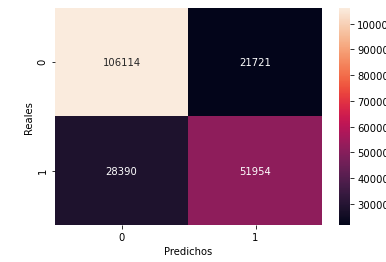

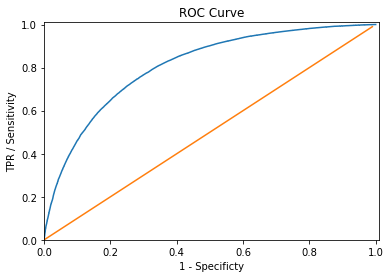

In [6]:
"""
Ejecuto metricas del modelo
"""
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_pred_proba[:,1])
df = pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))
print('ACCUARACY=', accuracy_score(y_test, y_pred))
print('\nAUC=', auc(fpr_knn, tpr_knn))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
# ROC Curve
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

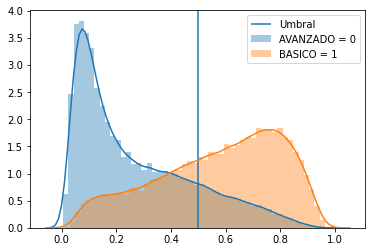

In [7]:
"Reviso el umbral dado que quizas me importa mas detectar a los alumnos con bajo nivel"

sns.distplot(lr.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(lr.predict_proba(X_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'AVANZADO = 0', 'BASICO = 1'])



Recall umbral 0.5= 0.6260921514450004

Recall umbral 0.4= 0.7397132402359794

AUC 0.5= 0.8079334143277241

AUC 0.4= 0.7330759010717116

ACCURACY 0.5= 0.7423264259157852

ACCURACY 0.4= 0.7315618064962389

PRECISION 0.5= 0.6806576009742237

PRECISION 0.4= 0.6295601881276217

Matrix Original

CLASS REPORT 0.5
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     42612
           1       0.68      0.63      0.65     26782

    accuracy                           0.74     69394
   macro avg       0.73      0.72      0.72     69394
weighted avg       0.74      0.74      0.74     69394


CLASS REPORT 0.4
              precision    recall  f1-score   support

           0       0.82      0.73      0.77     42612
           1       0.63      0.74      0.68     26782

    accuracy                           0.73     69394
   macro avg       0.72      0.73      0.72     69394
weighted avg       0.74      0.73      0.73     69394



array([[34745,  7867],
       [10014, 16768]], dtype=int64)


Nueva Matrix


array([[30955, 11657],
       [ 6971, 19811]], dtype=int64)

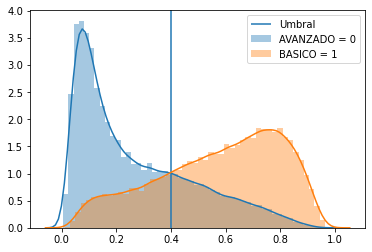

In [8]:
# Muevo el umbral y comparo matriz original contra nueva matriz
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_pred_proba, 0.4)[:,1]

y_pred_proba = lr.predict_proba(X_test)
sns.distplot(lr.predict_proba(X_train[y_train==0])[:,1])
sns.distplot(lr.predict_proba(X_train[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.4, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'AVANZADO = 0', 'BASICO = 1'])


print('Recall umbral 0.5=', recall_score(y_test, y_pred))
print('\nRecall umbral 0.4=', recall_score(y_test, y_pred_logit))
fpr_knn2,tpr_knn2,thr_knn2 = roc_curve(y_test, y_pred_logit)
print('\nAUC 0.5=', auc(fpr_knn, tpr_knn))
print('\nAUC 0.4=', auc(fpr_knn2, tpr_knn2))
print('\nACCURACY 0.5=',accuracy_score(y_test, y_pred))
print('\nACCURACY 0.4=',accuracy_score(y_test, y_pred_logit))
print('\nPRECISION 0.5=',precision_score(y_test, y_pred))
print('\nPRECISION 0.4=',precision_score(y_test, y_pred_logit))
print('\nMatrix Original')
print('\nCLASS REPORT 0.5')
print(classification_report(y_test, y_pred))
print('\nCLASS REPORT 0.4')
print(classification_report(y_test, y_pred_logit))
display(confusion_matrix(y_test,y_pred))
print('\nNueva Matrix')
display(confusion_matrix(y_test,y_pred_logit))

